# Homework 0 - Question 2: Convolution with a Gaussian Kernel and Smoothing

**Full Name:** [Enter your name here]

**Student ID:** [Enter your student ID here]

---
In this notebook, we will implement and analyze the practical aspects of signal and image smoothing using a Gaussian filter (kernel).

---

# Part (c): 1D Signal Smoothing and Frequency Domain Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

from skimage import data, util
from scipy.fft import fft, fftfreq
from scipy.signal import windows, convolve
from scipy.ndimage import gaussian_filter

### 1. Generating a Noisy Signal

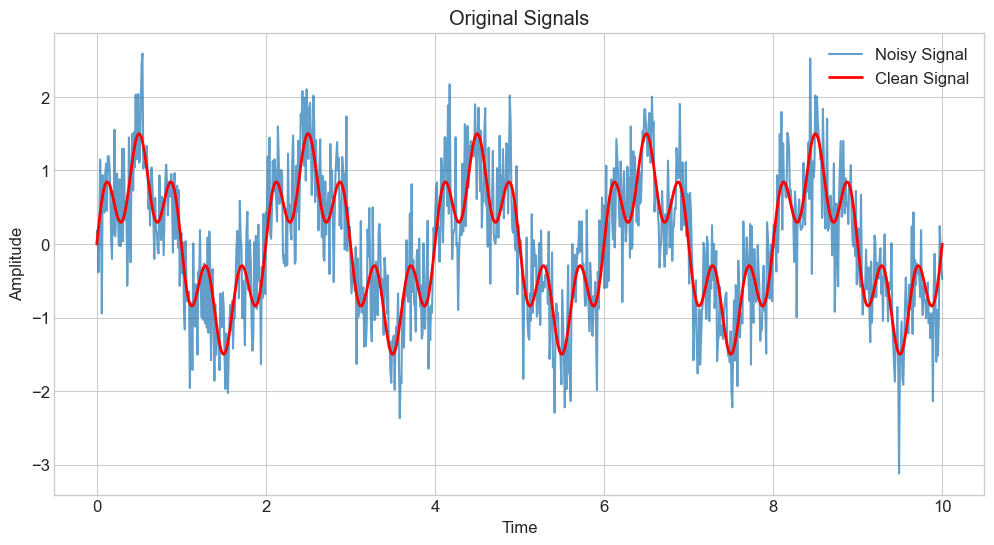

In [ ]:
# Plotting style settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Signal parameters
n_points = 1000
t = np.linspace(0, 10, n_points)

# Clean signal (combination of two frequencies)
signal_clean = np.sin(2 * np.pi * 0.5 * t) + 0.5 * np.sin(2 * np.pi * 2.5 * t)

# Add Gaussian noise
noise = 0.5 * np.random.randn(n_points)
signal_noisy = signal_clean + noise

# Plot the signals
plt.plot(t, signal_noisy, label='Noisy Signal', alpha=0.7)
plt.plot(t, signal_clean, 'r-', linewidth=2, label='Clean Signal')
plt.title('Original Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### 2. Smoothing the Signal with Two Different Gaussian Kernels

In [ ]:
# Create two Gaussian kernels with different standard deviations
sigma1 = None
sigma2 = None # Chose a larger second sigma for a more noticeable difference
M = 51 # Kernel length


# TODO: create two normalized kernels

# TODO: Convolve the noisy signal with both kernels
signal_smoothed1 = None
signal_smoothed2 = None

# Plot the results
plt.figure()
plt.plot(t, signal_noisy, label='Noisy Signal', alpha=0.4)
plt.plot(t, signal_smoothed1, linewidth=2, label=f'Smoothed (σ={sigma1})')
plt.plot(t, signal_smoothed2, linewidth=2, label=f'Smoothed (σ={sigma2})')
plt.plot(t, signal_clean, 'k--', linewidth=2, label='Original Clean Signal')
plt.title('Signal Smoothing with Gaussian Kernels')
plt.legend()
plt.show()

### 3. Quantitative Error Comparison
In this section, we will numerically check which signal is closer to the original **Clean Signal**.

In [ ]:
# Description: Use the 'norm' function to calculate the L2 distance (error) between the signals.

# TODO: Calculate the error of the noisy signal with respect to the clean signal.
error_noisy = None

# TODO: Calculate the error of the two smoothed signals with respect to the clean signal.
error_smoothed1 = None
error_smoothed2 = None

print(f"Error of Noisy Signal (||S_clean - S_noisy||_2): {error_noisy:.4f}")
print(f"Error of Smoothed Signal (σ={sigma1}) (||S_clean - S_smoothed1||_2): {error_smoothed1:.4f}")
print(f"Error of Smoothed Signal (σ={sigma2}) (||S_clean - S_smoothed2||_2): {error_smoothed2:.4f}")

### 4. Frequency Domain Analysis

In [ ]:
# Compute the Fourier Transform of the signals
yf_noisy = fft(signal_noisy)
yf_smoothed1 = fft(signal_smoothed1)
yf_smoothed2 = fft(signal_smoothed2)

# Compute the frequency axis
xf = fftfreq(n_points, t[1] - t[0])[:n_points//2]

# Plot the frequency spectrum
plt.plot(xf, 2.0/n_points * np.abs(yf_noisy[0:n_points//2]), label='Noisy Signal Spectrum', alpha=0.5)
plt.plot(xf, 2.0/n_points * np.abs(yf_smoothed1[0:n_points//2]), linewidth=2, label=f'Smoothed (σ={sigma1}) Spectrum')
plt.plot(xf, 2.0/n_points * np.abs(yf_smoothed2[0:n_points//2]), linewidth=2, label=f'Smoothed (σ={sigma2}) Spectrum')
plt.title('Frequency Spectrum Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### Analysis for Part (c)
**TODO:** Analyze the results. How do the error values calculated in section 3 show that the Gaussian filter succeeded in improving the signal? Explain this improvement using the frequency spectrum plots. Why might a sigma that is too large worsen the result?

Write your answer here:
...

---

# Part (d): Image Smoothing (Denoising) with a Gaussian Filter

### 1. Loading an Image and Adding Noise

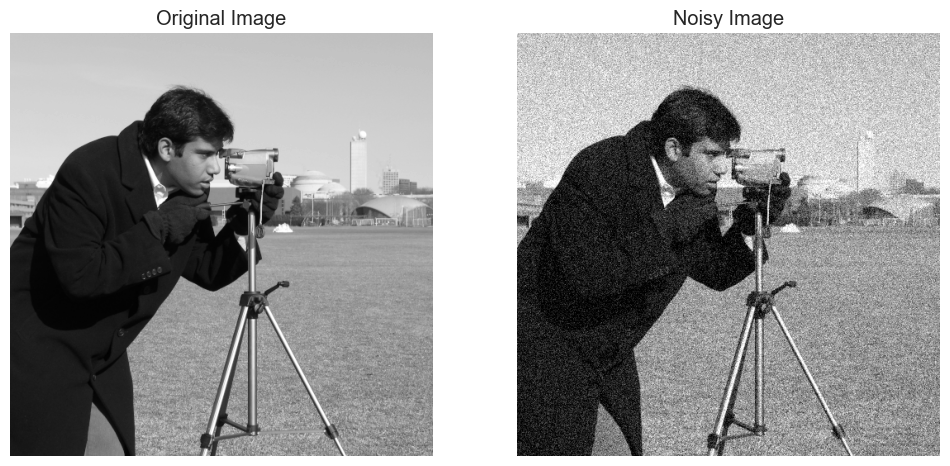

In [ ]:
image_original = data.camera().astype(float) / 255.0
image_noisy = util.random_noise(image_original, mode='gaussian', var=0.01)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_original, cmap='gray'); axes[0].set_title('Original Image'); axes[0].axis('off')
axes[1].imshow(image_noisy, cmap='gray'); axes[1].set_title('Noisy Image'); axes[1].axis('off')
plt.show()

### 2. Applying a 2D Gaussian Filter

In [ ]:
# TODO: Apply the Gaussian filter to the noisy image with a suitable sigma.
sigma_image = None
image_smoothed = None

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_noisy, cmap='gray'); axes[0].set_title('Noisy Image'); axes[0].axis('off')
axes[1].imshow(image_smoothed, cmap='gray'); axes[1].set_title(f'Smoothed Image (σ={sigma_image})'); axes[1].axis('off')
plt.show()

### 3. Quantitative Error Comparison
We will numerically check whether the smoothed image is closer to the original image.

In [ ]:
# TODO: Calculate the error of the noisy image with respect to the original image.
error_noisy_img = None

# TODO: Calculate the error of the smoothed image with respect to the original image.
error_smoothed_img = None

print(f"Error of Noisy Image (||A_orig - A_noisy||_2): {error_noisy_img:.4f}")
print(f"Error of Smoothed Image (||A_orig - A_smoothed||_2): {error_smoothed_img:.4f}")

### Analysis for Part (d)
**TODO:** Analyze the result. Do the error values confirm the success of the denoising process? What is the side effect of this process , and where is it most noticeable? Explain the trade-off between noise removal and preserving image details.

Write your answer here:
...